# 1. Problem Statement
 
1. What is the problem that you are trying to solve?
   
   **Answer**: The problem is regarding **Fraud detection** on credit card transactions.
   
   
2. What kind of prediction (classification / regression) task are you performing?

   **Answer**: This is a binary classification task. We have to predict if a transaction is genuine or fraudulent

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

In [3]:
import opendatasets as od

# 2. Data Acquisition

## 2.1 Download the data directly

The dataset has been downloaded from Kaggle website : **https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset**.

In [4]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset"

In [5]:
# Downloading the dataset
od.download(dataset)

Skipping, found downloaded files in ".\fraud-transactions-dataset" (use force=True to force download)


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [6]:
# Directory of the downloaded datasets in local system
data_dir = r'.\fraud-transactions-dataset'

In [7]:
# Listing out the datasets
os.listdir(data_dir)

['fraudTest.csv', 'fraudTrain.csv']

Reading the dataset using pandas

In [8]:
df_fraudTrain = pd.read_csv(r"C:\Users\nipun.gupta\Downloads\Credit card Fraud transaction detection\fraud-transactions-dataset\fraudTrain.csv", index_col=0)

In [9]:
df_fraudTrain.shape

(1296675, 22)

In [10]:
df_fraudTest = pd.read_csv(r"C:\Users\nipun.gupta\Downloads\Credit card Fraud transaction detection\fraud-transactions-dataset\fraudTest.csv", index_col=0)

In [11]:
df_fraudTest.shape

(555719, 22)

The **fraudTrain.csv** dataset is very huge in comparison to the **fraudTest.csv** dataset and thus working on the the **fraudTrain.csv** dataset will consume a lot of time for data cleaning and model training purpose. So we can consider **fraudTest.csv** for the problem scenario

## 2.3 Observations from the above dataframe

In [12]:
df_fraudTest.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#### Shape of the dataframe

In [13]:
df_fraudTest.shape

(555719, 22)

The dataframe consists of **555719** rows and **22** columns

#### Description of the attributes of the dataframe

trans_date_trans_time: The date and time of the transaction.

cc_num: credit card number.

merchant: Merchant who was getting paid.

category: In what area does that merchant deal.

amt: Amount of money in American Dollars.

first: first name of the card holder.

last: last name of the card holder.

gender: Gender of the cardholder.Just male and female!

street:Street of card holder residence

city:city of card holder residence

state:state of card holder residence

zip:ZIP code of card holder residence

lat:latitude of card holder

long:longitude of card holder

city_pop:Population of the city

job:trade of the card holder

dob:Date of birth of the card holder

trans_num: Transaction ID

unix_time: Unix time which is the time calculated since 1970 to today.

merch_lat: latitude of the merchant

merch_long:longitude of the merchant

is_fraud: Whether the transaction is fraud(1) or not(0)

In [14]:
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

### Data Preprocessing and Exploratory Data Analysis

#### Dropping irrelevant features

Based on domain knowledge, the attributes that will not be useful for fraud detection are :

 - trans_date_trans_time
 - cc_num
 - first
 - last
 - street
 - dob
 - zip
 - lat
 - long
 - trans_num
 - unix_time
 - merchant
 - city
 - job
 
 These attributes can be dropped 

In [15]:
df_fraudTest = df_fraudTest.drop(columns=["trans_date_trans_time", "cc_num", "first", "last", "street", "dob", "zip", "lat", "long", "trans_num", "unix_time", "merchant", "city", "job"], axis=1)

In [16]:
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   state       555719 non-null  object 
 4   city_pop    555719 non-null  int64  
 5   merch_lat   555719 non-null  float64
 6   merch_long  555719 non-null  float64
 7   is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 38.2+ MB


It can be observed that the irrelevant features have been dropped

#### Checking for duplicate rows

In [17]:
df_fraudTest.duplicated().sum()

0

There are no duplicate rows in the dataframe

Value count for feature is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

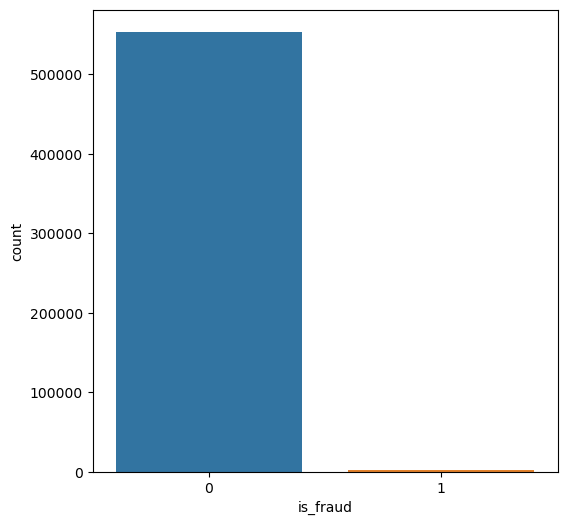

In [18]:
plt.figure(figsize=(6,6))
print("Value count for feature is_fraud")
print(df_fraudTest['is_fraud'].value_counts())
sns.countplot('is_fraud', data=df_fraudTest)

It can be observe that the dataframe is highly imbalanced. There are **553574** counts of genuine transactions whereas **2145** counts for fraud transactions. The dataset will need to be balanced

Value count for feature gender
F    304886
M    250833
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

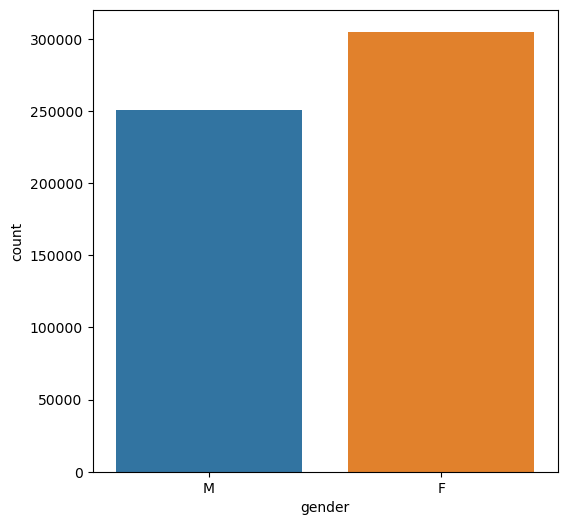

In [19]:
plt.figure(figsize=(6,6))
print("Value count for feature gender")
print(df_fraudTest['gender'].value_counts())
sns.countplot('gender', data=df_fraudTest)

It can be observed that there are **304886** females whereas **250833** males

#### Data Leakage and train test split

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

The indices of the dataframe will have to be reset

In [20]:
df_fraudTest.reset_index(inplace = True, drop = True)

In [21]:
df_fraudTest.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,SC,333497,33.986391,-81.200714,0
1,personal_care,29.84,F,UT,302,39.450498,-109.960431,0
2,health_fitness,41.28,F,NY,34496,40.495810,-74.196111,0
3,misc_pos,60.05,M,FL,54767,28.812398,-80.883061,0
4,travel,3.19,M,MI,1126,44.959148,-85.884734,0


#### Splitting the dataset into training and testing datasets

Separating the independent variables and the dependent variable

In [22]:
X = df_fraudTest.drop(columns=["is_fraud"], axis=1)
Y = df_fraudTest.is_fraud

Performing **train test split** using **scikit learn** module

In [23]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42, shuffle=True)

Checking the shape of the training and testing dataframes

In [24]:
X_train.shape

(277859, 7)

In [25]:
X_test.shape

(277860, 7)

In [26]:
y_train.shape

(277859,)

In [27]:
y_test.shape

(277860,)

Joining the training dataframe

In [28]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [29]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [30]:
df_train.reset_index(inplace = True, drop = True)

In [31]:
df_test.reset_index(inplace = True, drop = True)

Now we will clean the training dataset

Checking if there is any missing value in the dataset

In [32]:
df_train.isnull().sum()

category      0
amt           0
gender        0
state         0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

It can be observed there are no missing values in the training dataset

In [33]:
df_train.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,home,6.80,M,MD,626,39.752861,-78.727874,0
1,gas_transport,61.74,M,OR,841711,45.341148,-123.117822,0
2,shopping_pos,1501.30,F,WV,16183,39.324516,-81.006573,0
3,food_dining,1.90,F,MD,313,37.554991,-75.473321,0
4,entertainment,66.09,F,TX,1563,32.554119,-96.383418,0


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277859 entries, 0 to 277858
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    277859 non-null  object 
 1   amt         277859 non-null  float64
 2   gender      277859 non-null  object 
 3   state       277859 non-null  object 
 4   city_pop    277859 non-null  int64  
 5   merch_lat   277859 non-null  float64
 6   merch_long  277859 non-null  float64
 7   is_fraud    277859 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 17.0+ MB


It can be observed that there are **277859** rows in the training dataset

#### Extracting the continuous features from the data

In [35]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['merch_lat', 'merch_long', 'is_fraud']]

In [36]:
continuous_features

['amt', 'city_pop']

#### Plotting Boxplots to identify Univariate outliers

In [37]:
def create_boxplots(dataset, feature_list, target):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset[target], y=dataset[feature], data=dataset, hue=target, color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

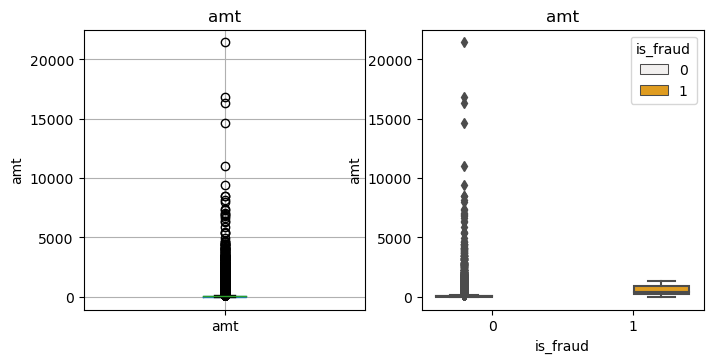

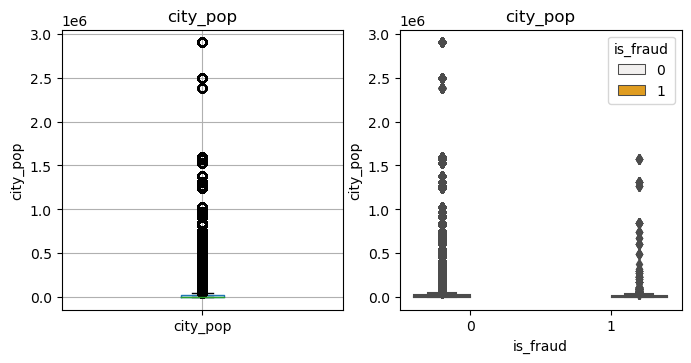

In [38]:
create_boxplots(df_train, continuous_features, 'is_fraud')

From the boxplots, it can be observed that the above continuous features have univariate outliers

#### Plotting histograms and distplots to check the distributions of continuous variables

In [39]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

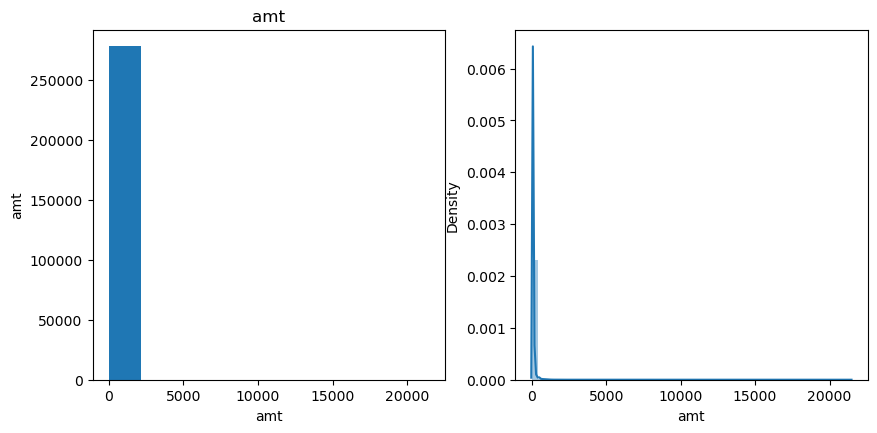

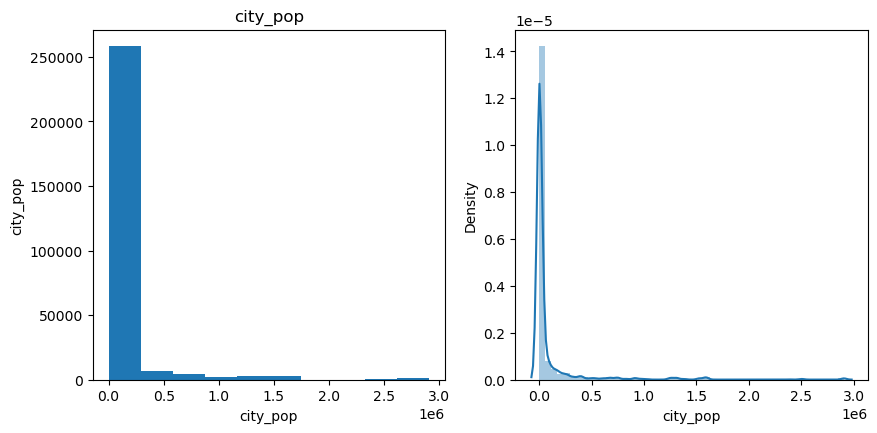

In [40]:
create_histograms_distplots(df_train, continuous_features)

From the above histograms and distplots, it can be observed that the above continuous features have skewness

#### Plotting a Heatmap for correlation analysis

<AxesSubplot:>

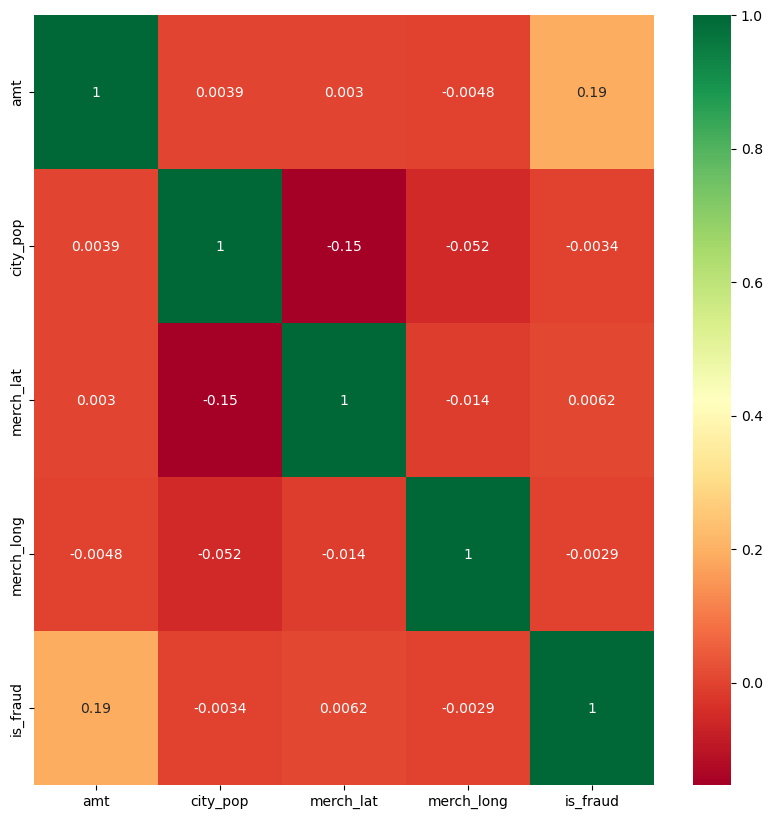

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

#### Creating Pivot table

In [42]:
pd.pivot_table(df_train, index='is_fraud', values=['amt', 'city_pop', 'merch_lat', 'merch_long'], aggfunc=['median'])

median                               
             amt city_pop  merch_lat merch_long
is_fraud                                       
0          47.01     2408  39.360680 -87.465025
1         382.18     3289  39.865905 -88.077309

It can be observed that fraud transactions correspond to a much higher median **amt(amount)** and **city_pop(city population)**. This implies that when the trnsaction amount is high, it is more likely for the transaction to be fraudulent

In [43]:
pd.pivot_table(df_train, index='gender', values=['amt', 'city_pop', 'merch_lat', 'merch_long'], aggfunc='median')

,amt,city_pop,merch_lat,merch_long
gender,,,,
F,43.16,2211,39.139656,-88.551806
M,51.32,2916,39.624762,-86.605122


It can be observed that males correspond to a higher median **amt(transaction amount)** and comprise a higher **city_pop(city population)**. This implies that males spend more and there are more number of males in the considered geographical area

In [44]:
df_train.groupby(['is_fraud', 'gender'])[['gender']].count().sort_values(['is_fraud']).rename(columns={'gender':'Count of males/females'})

Count of males/females
is_fraud gender                        
0        F                       152096
         M                       124700
1        F                          592
         M                          471

The above table shows the count of males/females for genuine and fraudulent transactions

<AxesSubplot:xlabel='is_fraud,gender'>

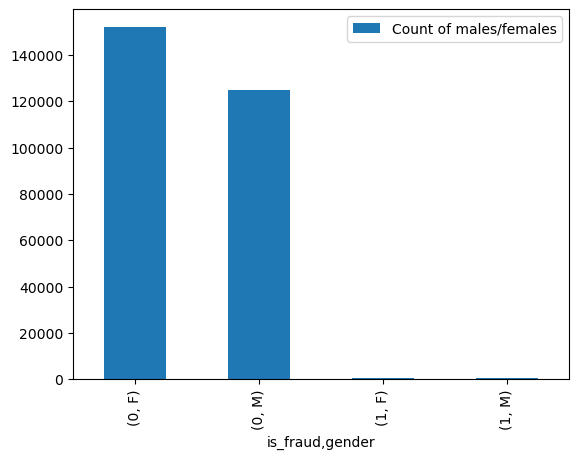

In [45]:
df_train.groupby(['is_fraud', 'gender'])[['gender']].count().sort_values(['is_fraud']).rename(columns={'gender':'Count of males/females'}).plot(kind='bar')

The above bar chart shows that there is higher count of females than males for genuine transactions. For fraudulent transactions, the number of males and females are approximately the same

In [46]:
df_train.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,home,6.80,M,MD,626,39.752861,-78.727874,0
1,gas_transport,61.74,M,OR,841711,45.341148,-123.117822,0
2,shopping_pos,1501.30,F,WV,16183,39.324516,-81.006573,0
3,food_dining,1.90,F,MD,313,37.554991,-75.473321,0
4,entertainment,66.09,F,TX,1563,32.554119,-96.383418,0


In [47]:
df_train.groupby(['is_fraud', 'category'])[['category']].count().sort_values(['is_fraud']).rename(columns={'category':'Count of merchants'})

Count of merchants
is_fraud category                          
0        entertainment                19918
         shopping_pos                 24790
         shopping_net                 20503
         personal_care                19681
         misc_pos                     17351
         misc_net                     13593
         kids_pets                    24490
         travel                        8710
         health_fitness               18288
         grocery_pos                  25888
         grocery_net                   9643
         gas_transport                28170
         food_dining                  19688
         home                         26083
1        shopping_net                   256
         personal_care                   37
         misc_pos                        34
         misc_net                       129
         kids_pets                       33
         home                            30
         grocery_net                     16
         grocery_pos                    254
         gas_transport                   69
         food_dining                     23
         entertainment                   29
         shopping_pos                   106
         health_fitness                  26
         travel                          21

<AxesSubplot:xlabel='is_fraud,category'>

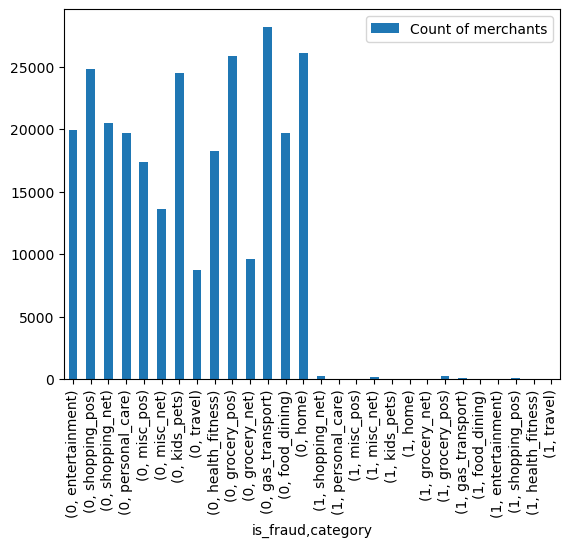

In [48]:
df_train.groupby(['is_fraud', 'category'])[['category']].count().sort_values(['is_fraud']).rename(columns={'category':'Count of merchants'}).plot(kind='bar')

#### Handling the outliers

In [49]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [50]:
remove_outliers(df_train, continuous_features)

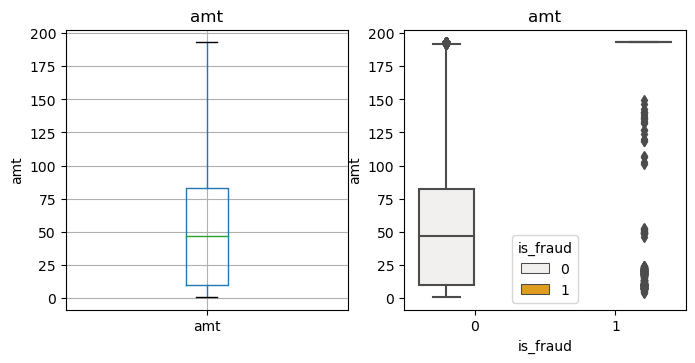

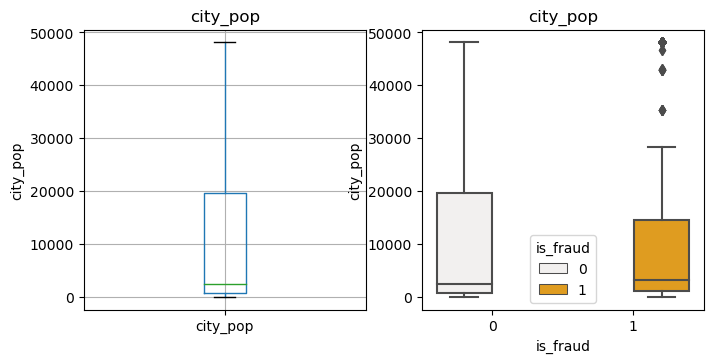

In [51]:
create_boxplots(df_train, continuous_features, 'is_fraud')

The univariate outliers have been treated

### Checking for skewness

Skewness scores to determine skewness in the column

In [52]:
from scipy.stats import skew

In [53]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    for feature in feature_list:
        variables.append(feature)
        skew_scores.append(skew(dataset[feature]))
        skew_dict = {'Feature': variables, 'Skewness Score': skew_scores}
        skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [54]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score
0,amt,1.059482
1,city_pop,1.185163


From the distplots and skewness scores, it can be observed that the feature columns **amt** and **city_pop** are considerably skewed. We will remove skewness by performing square root transformation

<AxesSubplot:xlabel='amt', ylabel='Density'>

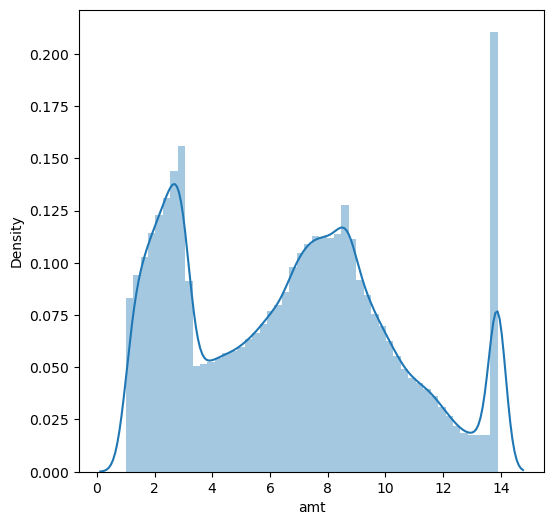

In [55]:
plt.figure(figsize=(6,6))
df_train['amt'] = np.sqrt(df_train['amt'])
sns.distplot(df_train['amt'])

<AxesSubplot:xlabel='city_pop', ylabel='Density'>

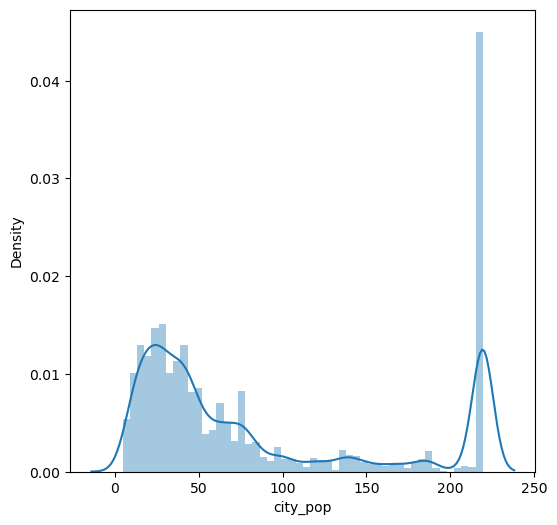

In [56]:
plt.figure(figsize=(6,6))
df_train['city_pop'] = np.sqrt(df_train['city_pop'])
sns.distplot(df_train['city_pop'])

The skewness has been handled

#### Separating the independent and dependent features in the training dataset

In [57]:
X = df_train.iloc[:,:-1]

In [58]:
Y = df_train.iloc[:,-1]

In [59]:
X.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long
0,home,2.607681,M,MD,25.019992,39.752861,-78.727874
1,gas_transport,7.857481,M,OR,219.319402,45.341148,-123.117822
2,shopping_pos,13.890644,F,WV,127.212421,39.324516,-81.006573
3,food_dining,1.378405,F,MD,17.691806,37.554991,-75.473321
4,entertainment,8.129576,F,TX,39.534795,32.554119,-96.383418


In [60]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

#### Encoding of categorical variables in the training dataset

In [61]:
categorical_features = [feature for feature in X.select_dtypes(np.object).columns]

In [62]:
categorical_features

['category', 'gender', 'state']

In [63]:
for col in categorical_features:
    print('Unique categories in the feature', col, ': ', X[col].nunique())

Unique categories in the feature category :  14
Unique categories in the feature gender :  2
Unique categories in the feature state :  50


It can be observed that the features **merchant**, **city**, **state** and **job** have too many categories. So for each of the features, we can consider the top 10 categories having higher counts than the remaining categories

In [64]:
def one_hot_top_10(dataset, variable):
    top_10 = [x for x in dataset[variable].value_counts().sort_values(ascending=False).head(10).index]
    
    for label in top_10:
        dataset[variable+'_'+label] = np.where(dataset[variable]==label,1,0)

In [65]:
one_hot_top_10(X, 'state')

In [66]:
X = X.drop(columns=["state"], axis=1)

In [67]:
X = pd.get_dummies(X, drop_first=True)

In [68]:
X.head(10)

,amt,city_pop,merch_lat,merch_long,state_TX,state_NY,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.607681,25.019992,39.752861,-78.727874,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,7.857481,219.319402,45.341148,-123.117822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.890644,127.212421,39.324516,-81.006573,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.378405,17.691806,37.554991,-75.473321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.129576,39.534795,32.554119,-96.383418,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5.384236,35.651087,43.217609,-76.838025,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7.584853,18.466185,39.523698,-81.733606,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
7,1.913113,219.319402,43.159532,-87.176356,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,8.742425,54.000000,44.822887,-93.043369,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,9.954898,8.774964,46.248864,-101.443055,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Handling imbalance in the data

In [69]:
print(Y.value_counts())

0    276796
1      1063
Name: is_fraud, dtype: int64


It can be observed that there is a huge imbalance in the target column **is_fraud** in the dataset

We will perform **oversampling** using **SMOTEtomek** technique

In [70]:
# Installing imblearn library
!pip install imblearn

In [71]:
# Importing SMOTETomek
from imblearn.combine import SMOTETomek

In [72]:
# Initializing SMOTETomek
os = SMOTETomek(random_state=42)

In [73]:
# Fitting the training data onto the SMOTETomek object
X_train, Y_train = os.fit_resample(X, Y)

In [74]:
from collections import Counter

In [75]:
print("Number of classes after fit {}".format(Counter(Y_train)))

Number of classes after fit Counter({0: 276788, 1: 276788})


Joining **X_train** and **Y_train** dataframes

In [76]:
df_train = X_train.join(Y_train, how='inner')

Value count for feature is_fraud
0    276788
1    276788
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

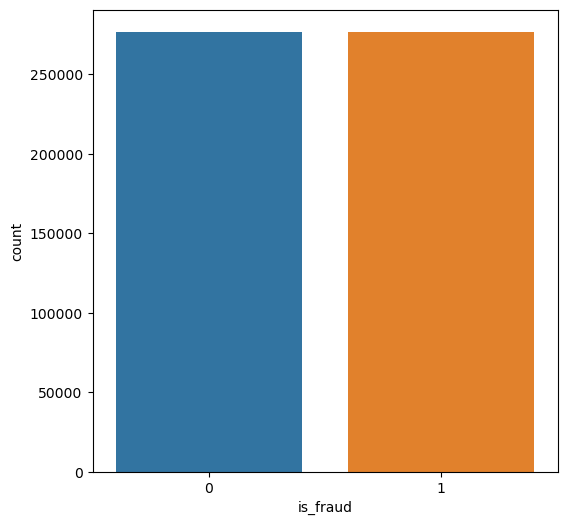

In [77]:
plt.figure(figsize=(6,6))
print("Value count for feature is_fraud")
print(df_train['is_fraud'].value_counts())
sns.countplot('is_fraud', data=df_train)

It can be observed that the dataset is quite balanced now

#### Feature Selection in the training dataset

Feature Selection is performed to retain only the important features and discard the irrelevant features

In [78]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,state_TX,state_NY,state_PA,state_CA,state_OH,state_MI,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,2.607681,25.019992,39.752861,-78.727874,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,7.857481,219.319402,45.341148,-123.117822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13.890644,127.212421,39.324516,-81.006573,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.378405,17.691806,37.554991,-75.473321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.129576,39.534795,32.554119,-96.383418,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [80]:
X = df_train.iloc[:,:-1]

In [81]:
Y = df_train.iloc[:,-1]

In [82]:
bestfeatures = SelectKBest(score_func = chi2)

For fitting the data on the feature selection algorithm, we need to consider non-negative values of the data. So we can use **abs(absolute)** function to obtain the absolute positive value

In [83]:
X['merch_long'] = abs(X['merch_long'])

In [84]:
X['merch_lat'] = abs(X['merch_lat'])

In [85]:
fit = bestfeatures.fit(X, Y)

In [86]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [87]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [88]:
featureScores.columns = ['Features', 'Score']

In [89]:
featureScores.sort_values(by='Score', ascending=False)

,Features,Score
0,amt,400855.525348
19,category_home,24783.593455
20,category_kids_pets,20683.257590
14,category_food_dining,19619.107351
23,category_personal_care,16157.725165
18,category_health_fitness,14988.612337
15,category_gas_transport,14482.441562
22,category_misc_pos,14353.961975
25,category_shopping_pos,13335.501668
16,category_grocery_net,8006.517882


The features that have high scores are more correlated with the target variable.

The features **state_MO**, **category_grocery_pos**, **state_NY** and **state_FL** do not contribute much to the prediction of the target variable

#### Feature Importance

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

In [91]:
model = ExtraTreesClassifier()

In [92]:
model.fit(X,Y)

ExtraTreesClassifier()

In [93]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

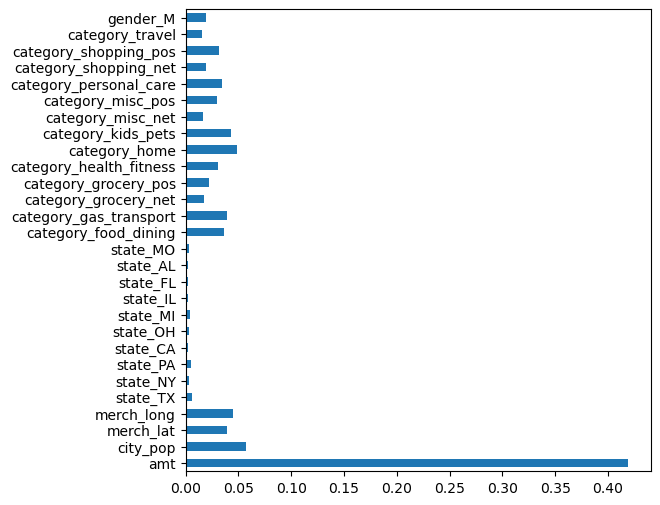

In [94]:
plt.figure(figsize=(6,6))
feat_importances.plot(kind='barh')
plt.show()

The above barplot displays the feature importance scores. From the above barplot, it can be observed that none of the states are important and thus can be removed from the dataset

In [95]:
df_train = df_train.drop(['state_FL', 'state_NY', 'state_MO'], axis = 1)

In [96]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,2.607681,25.019992,39.752861,-78.727874,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,7.857481,219.319402,45.341148,-123.117822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13.890644,127.212421,39.324516,-81.006573,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.378405,17.691806,37.554991,-75.473321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.129576,39.534795,32.554119,-96.383418,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature scaling

In [97]:
df_train.describe()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,...,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.0
mean,9.246426,86.078073,38.784934,-90.597202,0.051169,0.052667,0.040686,0.024208,0.025122,0.029134,...,0.047918,0.046705,0.036974,0.033302,0.037859,0.085226,0.053617,0.017681,0.400671,0.5
std,4.563692,73.817807,5.002378,14.199987,0.220343,0.223367,0.197563,0.153695,0.156496,0.168183,...,0.213592,0.211007,0.188698,0.179423,0.190856,0.279218,0.225260,0.131791,0.490035,0.5
min,1.000000,4.795832,19.027422,-166.671575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.619673,29.631065,34.963217,-97.231770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,9.603124,53.254108,39.597914,-87.948547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
75%,13.890644,130.564160,41.990381,-79.944798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,13.890644,219.319402,66.674714,-66.952352,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


It can be observed that there is different in the scales of respective continuous features. So we need to perform feature scaling. We can use **MinMaxScaler** to perform Min max normalization

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
std_scaler = MinMaxScaler()

In [100]:
std_scaler.fit(df_train)

MinMaxScaler()

In [101]:
df_train_scaled = std_scaler.transform(df_train)

In [102]:
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [103]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,0.124717,0.094275,0.434976,0.881913,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.531973,1.000000,0.552261,0.436764,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.570644,0.425986,0.859062,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.029355,0.060114,0.388848,0.914550,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.553081,0.161935,0.283892,0.704861,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df_train.describe()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,...,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.0
mean,0.639722,0.378897,0.414662,0.762886,0.051169,0.052667,0.040686,0.024208,0.025122,0.029134,...,0.047918,0.046705,0.036974,0.033302,0.037859,0.085226,0.053617,0.017681,0.400671,0.5
std,0.354031,0.344101,0.104988,0.142400,0.220343,0.223367,0.197563,0.153695,0.156496,0.168183,...,0.213592,0.211007,0.188698,0.179423,0.190856,0.279218,0.225260,0.131791,0.490035,0.5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.280798,0.115769,0.334453,0.696353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.667393,0.225888,0.431724,0.789447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
75%,1.000000,0.586268,0.481936,0.869710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


It can be observed that the features have been scaled in the training dataset

#### Performing feature engineering on the test dataset

In [105]:
df_test.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,shopping_pos,1.07,F,CT,5438,41.240083,-71.837788,0
1,kids_pets,94.99,M,OK,7163,35.156537,-95.806648,0
2,kids_pets,31.28,F,MO,602,39.888665,-93.106804,0
3,gas_transport,73.06,M,OK,7163,36.734101,-96.737345,0
4,misc_net,9.99,F,IA,2036,40.922072,-94.899388,0


Checking if there are any missing values in the test dataset

In [106]:
df_test.isnull().sum()

category      0
amt           0
gender        0
state         0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

#### Encoding of categorical variables in the training dataset

In [107]:
categorical_features = [feature for feature in df_test.select_dtypes(np.object).columns]

In [108]:
categorical_features

['category', 'gender', 'state']

In [109]:
for col in categorical_features:
    print('Unique categories in the feature', col, ': ', df_test[col].nunique())

Unique categories in the feature category :  14
Unique categories in the feature gender :  2
Unique categories in the feature state :  50


In [110]:
def one_hot_top_10(dataset, variable):
    top_10 = [x for x in dataset[variable].value_counts().sort_values(ascending=False).head(10).index]
    
    for label in top_10:
        dataset[variable+'_'+label] = np.where(dataset[variable]==label,1,0)

In [111]:
one_hot_top_10(df_test, 'state')

In [112]:
df_test = df_test.drop(columns=["state"], axis=1)

In [113]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [114]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_NY,state_PA,state_CA,state_OH,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,1.07,5438,41.240083,-71.837788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,94.99,7163,35.156537,-95.806648,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,31.28,602,39.888665,-93.106804,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,73.06,7163,36.734101,-96.737345,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.99,2036,40.922072,-94.899388,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Feature Selection and Feature scaling in the testing dataset

In [115]:
df_test = df_test.drop(['state_FL', 'state_NY', 'state_MO'], axis = 1)

In [116]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,1.07,5438,41.240083,-71.837788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,94.99,7163,35.156537,-95.806648,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,31.28,602,39.888665,-93.106804,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,73.06,7163,36.734101,-96.737345,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.99,2036,40.922072,-94.899388,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [117]:
df_test.describe()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,277860.000000,2.778600e+05,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,...,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000
mean,69.663882,8.814643e+04,38.549467,-90.212141,0.003894,0.072324,0.061383,0.042982,0.036709,0.035827,...,0.066076,0.094407,0.086983,0.049107,0.061862,0.070572,0.075650,0.089595,0.031376,0.452249
std,160.440865,2.997059e+05,5.100443,13.734059,0.062281,0.259024,0.240033,0.202817,0.188047,0.185860,...,0.248416,0.292395,0.281810,0.216093,0.240905,0.256108,0.264437,0.285602,0.174331,0.497716
min,1.000000,2.300000e+01,19.027849,-166.670006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.660000,7.410000e+02,34.770097,-96.875338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.420000,2.408000e+03,39.392480,-87.421527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.090000,1.968500e+04,41.961519,-80.270665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22768.110000,2.906700e+06,66.679297,-66.952026,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
df_test['merch_long'] = abs(df_test['merch_long'])

In [119]:
df_test['merch_lat'] = abs(df_test['merch_lat'])

In [120]:
df_test_scaled = std_scaler.transform(df_test)

In [121]:
df_test = pd.DataFrame(df_test_scaled, columns=df_test.columns)

In [122]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.005430,25.326840,0.466189,2.391809,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.291335,33.367915,0.338511,2.632173,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.348990,2.783863,0.437826,2.605098,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.590101,33.367915,0.371620,2.641506,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.697405,9.468443,0.459515,2.623075,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
df_test.describe()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,...,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000
mean,5.326645,410.871571,0.409720,2.576070,0.003894,0.072324,0.061383,0.042982,0.036709,0.035827,...,0.066076,0.094407,0.086983,0.049107,0.061862,0.070572,0.075650,0.089595,0.031376,0.452249
std,12.446303,1397.076883,0.107046,0.137727,0.062281,0.259024,0.240033,0.202817,0.188047,0.185860,...,0.248416,0.292395,0.281810,0.216093,0.240905,0.256108,0.264437,0.285602,0.174331,0.497716
min,0.000000,0.084859,0.000009,2.342814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.671805,3.431810,0.330400,2.476375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.601061,11.202518,0.427413,2.548085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.368184,91.739123,0.481331,2.642890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1766.173157,13549.537706,1.000096,3.342802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The training and the test dataframes are ready for model training and testing purpose

### Separating the target feature in the training and testing datasets

In [124]:
X_train = df_train.drop(columns=["is_fraud"], axis=1)
Y_train = df_train.is_fraud

In [125]:
X_test = df_test.drop(columns=["is_fraud"], axis=1)
Y_test = df_test.is_fraud

# 4. Deep Neural Network Architecture

#### Importing the keras libraries and packages

In [126]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

* Initiating the ANN. This will be an empty neural network when instantiated

In [127]:
model = Sequential()

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [128]:
# Number of features
input_dim = X_train.shape[1]

# Adding the input layer
model.add(layers.Dense(units=32, kernel_initializer = 'he_uniform', input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))

# Adding the first hidden layer
model.add(layers.Dense(units=16, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dropout(0.4))

# Adding the first hidden layer
model.add(layers.Dense(units=8, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dropout(0.3))

# Adding the output layer
model.add(layers.Dense(units=1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

### Reason/Justification for choosing the number of layers, nodes, activation function

In the above code, **he_uniform** is a technique to intialize the weights of the ANN. This technique works well with **relu** activation function. The **relu** activation function prevents vanishing gradient problem. **sigmoid** activation function is helpful in binary classification

We have passed the **input dimensions** in the input layer

We are considering 16 neurons in the input layer, 8 neurons in the first hidden layerand 4 neurons in the second hidden layer.

The output layer will have 1 neuron because this is a binary classification problem

The number of hidden neurons should be between the size of the input layer and the size of the output layer. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

Here are some guidelines to know the number of hidden layers and neurons per each hidden layer in a classification problem:

Based on the data, draw an expected decision boundary to separate the classes.
Express the decision boundary as a set of lines. Note that the combination of such lines must yield to the decision boundary. The number of selected lines represents the number of hidden neurons in the first hidden layer. To connect the lines created by the previous layer, a new hidden layer is added each time you need to create connections among the lines in the previous hidden layer. The number of hidden neurons in each new hidden layer equals the number of connections to be made.

In [129]:
#Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

The above summary shows the number of layers in the ANN model, the number of neurons in each of the layers

# 5. Training the model

## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

In [130]:
# Compiling the ANN
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

We have selected the **adam** optimizer for backpropagation

Whenever the output is binary, then we can select **binary_crossentropy** for the loss

We have selected **accuracy** as the metrics

## 5.2 Train the model

In [131]:
# Fitting the ANN to the training set
classifier_nn = model.fit(X_train,Y_train,
                          validation_split = 0.33,
                          epochs=15,
                          verbose=True,
                          batch_size=256)

Epoch 1/15
1449/1449 [==============================] - 10s 6ms/step - loss: 0.3017 - accuracy: 0.8767 - val_loss: 0.3860 - val_accuracy: 0.8925
Epoch 2/15
1449/1449 [==============================] - 8s 5ms/step - loss: 0.1855 - accuracy: 0.9307 - val_loss: 0.2333 - val_accuracy: 0.9329
Epoch 3/15
1449/1449 [==============================] - 8s 5ms/step - loss: 0.1568 - accuracy: 0.9405 - val_loss: 0.2079 - val_accuracy: 0.9397
Epoch 4/15
1449/1449 [==============================] - 8s 5ms/step - loss: 0.1443 - accuracy: 0.9439 - val_loss: 0.1830 - val_accuracy: 0.9477
Epoch 5/15
1449/1449 [==============================] - 8s 5ms/step - loss: 0.1390 - accuracy: 0.9456 - val_loss: 0.1682 - val_accuracy: 0.9560
Epoch 6/15
1449/1449 [==============================] - 8s 5ms/step - loss: 0.1348 - accuracy: 0.9467 - val_loss: 0.1841 - val_accuracy: 0.9481
Epoch 7/15
1449/1449 [==============================] - 8s 5ms/step - loss: 0.1323 - accuracy: 0.9474 - val_loss: 0.1691 - val_accuracy

**batch_size** is used to specify the number of data points for computations in respective iterations so that less computation power is required

# 6. Test the model

In [132]:
# Predict Labels
testLoss, testAccuracy = model.evaluate(X_test, Y_test, verbose=0)

# Predict Labels
Y_pred = model.predict(X_test)

for i in range(len(Y_pred)):
    if Y_pred[i]>0.5:
        Y_pred[i]=1
    elif Y_pred[i]<=0.5:
        Y_pred[i]=0

8684/8684 [==============================] - 18s 2ms/step


## 7.  Conclusion 

Plot the training and validation accuracy and loss report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

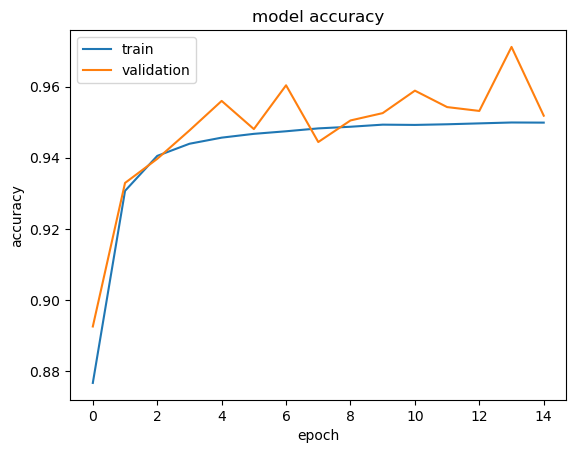

In [133]:
# summarize history for accuracy between training and validation

import matplotlib.pyplot as plt

plt.plot(classifier_nn.history['accuracy'])
plt.plot(classifier_nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

It can be observed that at the 15th epoch, the training and validation accuracy are quite close

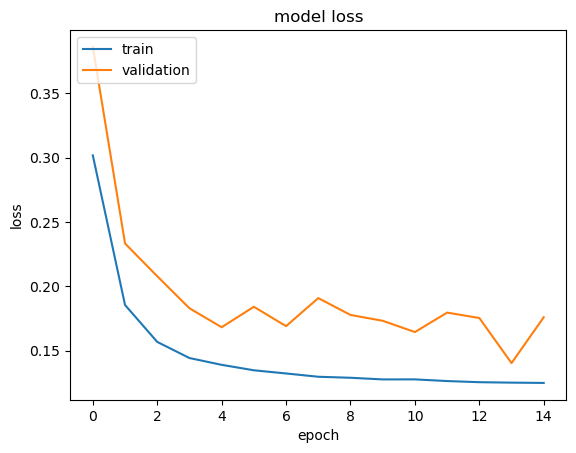

In [134]:
# summarize history for loss between training and validation

import matplotlib.pyplot as plt

plt.plot(classifier_nn.history['loss'])
plt.plot(classifier_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

It can be observed that the training and the validation loss have reduced with increase in the epochs

#### Determining model accuracy

In [135]:
from sklearn.metrics import accuracy_score

In [136]:
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred)*100))

accuracy score :  81.58209170085655


The accuracy of the ANN model is good

<AxesSubplot:>

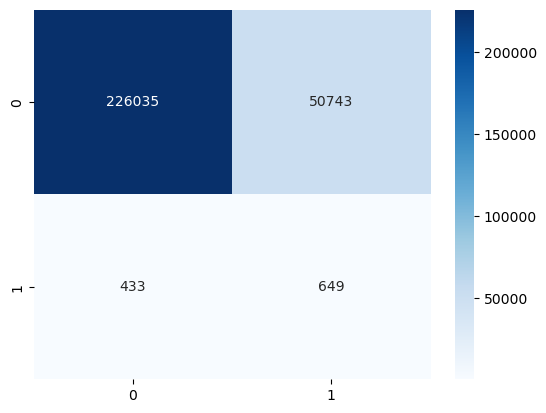

In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True, cmap = 'Blues', fmt='g')

As per the confusion matrix, the false positives and false negatives are high

In [138]:
# Classification Report    
print('Classfication report = \n', classification_report(Y_test, Y_pred))

Classfication report = 
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90    276778
         1.0       0.01      0.60      0.02      1082

    accuracy                           0.82    277860
   macro avg       0.51      0.71      0.46    277860
weighted avg       0.99      0.82      0.89    277860



The precision and recall scores are poor

### Hyperparameter tuning

In [139]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.activations import relu, sigmoid

We will perform **GridSearchCV** to select the suitable hyperaprameters.

We will create a function where we will initialize the Sequential model. We will provide the layers and the type of activations required as arguments to this function

In [140]:
def create_model(layers, activation):
    model_new = Sequential()
    # We will iterate through the layers and create the dense neurons
    for i, nodes in enumerate(layers):
        # For the input layer, we will provide the input dimension 
        if i==0:
            model_new.add(Dense(nodes, input_dim=X_train.shape[1]))
            model_new.add(Activation(activation))
            model_new.add(Dropout(0.3))
        else:
        # For the successive layers, we do not need to provide the input dimension
            model_new.add(Dense(nodes))
            model_new.add(Activation(activation))
            model_new.add(Dropout(0.3))
            
    # The output layer will have only 1 neuron
    model_new.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the model
    model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_new

**KerasClassifier** is the classifier that we will build. We will pass the **create_model** function to it as an argument

In [141]:
model_new_2 = KerasClassifier(build_fn=create_model, verbose=0)

In [142]:
# In the first iteration, there will be 1 hidden layer with 20 neurons

# In the second iteration, there will be 2 hidden layers with 40 and 20 neurons respectively

layers = [[20], [40, 20]]

In [143]:
# The activation functions used for hyperparameter tuning are sigmoid and relu. For the first iteration, sigmoid will be used for the hidden layers
# for the second iteration, sigmoid will be used for the hidden layers
activations = ['sigmoid', 'relu']

In [144]:
# Preparing a dictionary of the hyperparameters
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs = [10])

In [145]:
# Building the GridSearchCV model
grid = GridSearchCV(estimator=model_new_2, param_grid=param_grid, cv=5)

In [146]:
# Training the GridSearchCV
grid_result = grid.fit(X_train, Y_train)

### Model best results

In [147]:
print(grid_result.best_score_, grid_result.best_params_)

0.9517989039421082 {'activation': 'relu', 'batch_size': 256, 'epochs': 10, 'layers': [40, 20]}


In [148]:
pred_y = grid.predict(X_test)

8684/8684 [==============================] - 17s 2ms/step


In [149]:
y_pred = (pred_y > 0.5)

<AxesSubplot:>

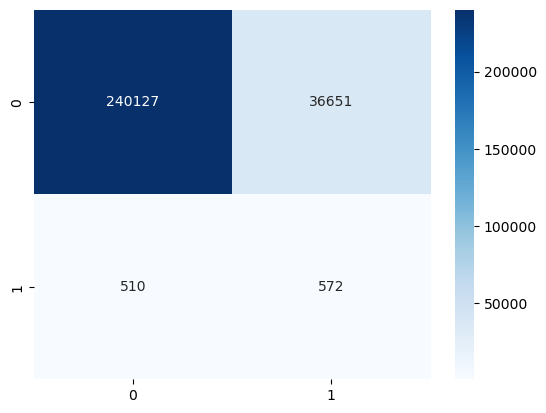

In [150]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True, cmap = 'Blues', fmt='g')

In [151]:
score = accuracy_score(Y_test, y_pred)

In [152]:
score

0.866259987043835

In [153]:
print('Classfication report = \n', classification_report(Y_test, y_pred))

Classfication report = 
               precision    recall  f1-score   support

         0.0       1.00      0.87      0.93    276778
         1.0       0.02      0.53      0.03      1082

    accuracy                           0.87    277860
   macro avg       0.51      0.70      0.48    277860
weighted avg       0.99      0.87      0.92    277860



The above are the results of **Hyperparameter tuning**

# 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.



We propose an ANN Deep Learning solution for the credit card fraud transaction detection problem scenario

Challenges faced :

 - Huge dataset
 - Oversampling of the dataset took long time


Observations :

 - The ANN model is predicting well on the genuine transactions but not so well on the fraudulent transactions
 
 - The precision, recall and F1 scores are good for genuine transactions but not so good for fraudulent transactions
 
 - The ANN model is performing well on the training and validation datasets 

### Alternative Way: Data Modelling - Random Forest

In [154]:
# Building random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators  = 300)

In [155]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=300)

In [156]:
predictions = rfc.predict(X_test)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    276778
         1.0       0.01      0.10      0.02      1082

    accuracy                           0.96    277860
   macro avg       0.50      0.53      0.50    277860
weighted avg       0.99      0.96      0.97    277860



In [158]:
print(confusion_matrix(Y_test,predictions))

[[265253  11525]
 [   972    110]]


Decisions made :

 - The random forest model is performing poorer than ANN model
 - Hyperparameter tuning does not significantly improve the performance in this scenario for the chosen hyperparameters